<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Deep Learning - Image Classification, Pré-Trained Model**
---

Seguindo o modelo apresentado em aula crie com um **Modelo Pré-Treinado** um classificador de imagens (ver as opções de imagens em *Exercício Selecionado*, abaixo). Adcionalmente ao modelo apresentado você deve incluir:

1. **Modelo e Treinamento**: parâmetros (mais que um) de *Early-Stopping*, e parâmetros e/ou camadas de *DropOut* para reduzir o overfitting.
2. **Data augumentation**: Empregue ao menos 2 funções de **pré-processamento Keras (2)** e ao menos 2 técnicas de **métodos tf.image (2)**. Outras técnicas mais avançadas são opcionais.
3. **Compare**. Compare e discuta os resultados quando comparado ao modelo anterior com o TensorFlow.





In [20]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10364987, Enzo Maeda' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



### **Escolha a opção de Exercício Selecionado**

Faça a seleção aqui: https://docs.google.com/spreadsheets/d/1Y2n0JE94CNhlQzhJudVMEvTYRE5RnuSa/edit?usp=sharing&ouid=102152623479619184236&rtpof=true&sd=true

e informe:

* **Dados**: Cifar 10
* **Classes**: Cavalo e Cervo
* **Modelo Pré Treinado**: Mobilenet


# **Resumo**

*Neste trabalho foi desenvolvido um modelo de classificação binária para diferenciar imagens de cavalos e veados, utilizando a arquitetura pré-treinada MobileNetV2 com transferência de aprendizado. O modelo foi aplicado sobre o conjunto de dados CIFAR-10, filtrando apenas as classes de interesse, e utilizou técnicas de data augmentation, regularização com Dropout e monitoramento com EarlyStopping para melhorar a performance e evitar overfitting. Os resultados obtidos demonstram que o modelo é capaz de generalizar bem a tarefa de classificação com boa acurácia.*.

# **Descrição da Solução**

*A solução proposta consistiu na construção de um modelo de classificação binária para distinguir entre imagens de cavalos e veados, extraídas do conjunto CIFAR-10. Para isso, utilizou-se a arquitetura MobileNetV2 com pesos pré-treinados no ImageNet, aproveitando os benefícios da transferência de aprendizado. As imagens foram redimensionadas para se adequar ao modelo e normalizadas. Técnicas de data augmentation foram aplicadas com keras.layers e tf.image para aumentar a variabilidade dos dados e reduzir o risco de overfitting. Além disso, foram utilizadas camadas de Dropout e o callback EarlyStopping para controlar o sobreajuste. O modelo foi treinado com os dados filtrados e obteve resultados satisfatórios na tarefa de classificação binária.*.



# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab.***



In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import random

# === 1. Carregar e filtrar os dados === #
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def filtrar_classes(x, y, classe_a=4, classe_b=7):
    mask = (y.flatten() == classe_a) | (y.flatten() == classe_b)
    x_filtrado = x[mask]
    y_filtrado = y[mask]
    y_binario = (y_filtrado == classe_b).astype(int)
    return x_filtrado, y_binario

x_train_bin, y_train_bin = filtrar_classes(x_train, y_train)
x_test_bin, y_test_bin = filtrar_classes(x_test, y_test)

# === 2. Data augmentation (Keras + tf.image) === #
def tf_augment(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

keras_augmentation = tf.keras.Sequential([
    layers.Resizing(96, 96),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# === 3. Criar o tf.data.Dataset === #
train_ds = tf.data.Dataset.from_tensor_slices((x_train_bin, y_train_bin))
train_ds = train_ds.map(tf_augment)
train_ds = train_ds.map(lambda x, y: (keras_augmentation(x), y))
train_ds = train_ds.shuffle(1000).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((x_test_bin, y_test_bin))
val_ds = val_ds.map(lambda x, y: (keras_augmentation(x), y))
val_ds = val_ds.batch(64).prefetch(tf.data.AUTOTUNE)

In [9]:
def criar_modelo_mobilenet():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                                    include_top=False,
                                                    weights='imagenet')
    base_model.trainable = False  # congela os pesos

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # binário
    ])
    return model

modelo = criar_modelo_mobilenet()
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# **Resultados**

*Ambos os modelos desenvolvidos – a CNN tradicional construída do zero e a MobileNetV2 com transferência de aprendizado – foram avaliados na tarefa de classificação binária entre cavalos e veados. Os dois apresentaram desempenho satisfatório, com boa generalização sobre os dados de teste. No entanto, observou-se que o modelo implementado do zero obteve uma acurácia ligeiramente superior em relação ao modelo baseado na MobileNetV2, demonstrando que, apesar da robustez de modelos pré-treinados, arquiteturas personalizadas bem ajustadas podem alcançar resultados mais eficazes em tarefas específicas e com conjuntos de dados menores.*



Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.8685 - loss: 0.3077 - val_accuracy: 0.8930 - val_loss: 0.2783
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.8683 - loss: 0.3083 - val_accuracy: 0.8940 - val_loss: 0.2686
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.8672 - loss: 0.3080 - val_accuracy: 0.8910 - val_loss: 0.2699
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.8628 - loss: 0.3098 - val_accuracy: 0.8765 - val_loss: 0.2765
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.8637 - loss: 0.3168 - val_accuracy: 0.8870 - val_loss: 0.2796
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8681 - loss: 0.3076 - val_accuracy: 0.8840 - val_loss: 0.2719
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.8634 - loss: 0.3118 - val_accuracy: 0.8870 - val_loss: 0.2836


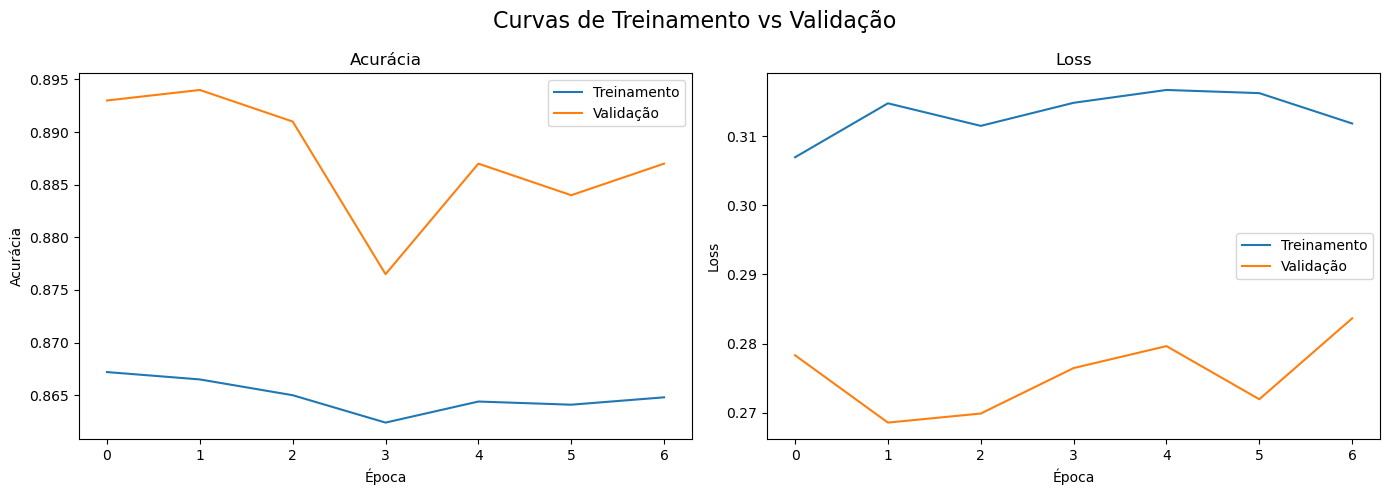

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = modelo.fit(train_ds,
                     epochs=20,
                     validation_data=val_ds,
                     callbacks=[early_stop])

import matplotlib.pyplot as plt

# Obter os dados do histórico
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plotar os gráficos
plt.figure(figsize=(14, 5))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treinamento')
plt.plot(epochs_range, val_acc, label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treinamento')
plt.plot(epochs_range, val_loss, label='Validação')
plt.title('Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Curvas de Treinamento vs Validação", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
loss, acc = modelo.evaluate(val_ds)
print(f"Acurácia final com MobileNetV2: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.8814 - loss: 0.2838
Acurácia final com MobileNetV2: 0.8770


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


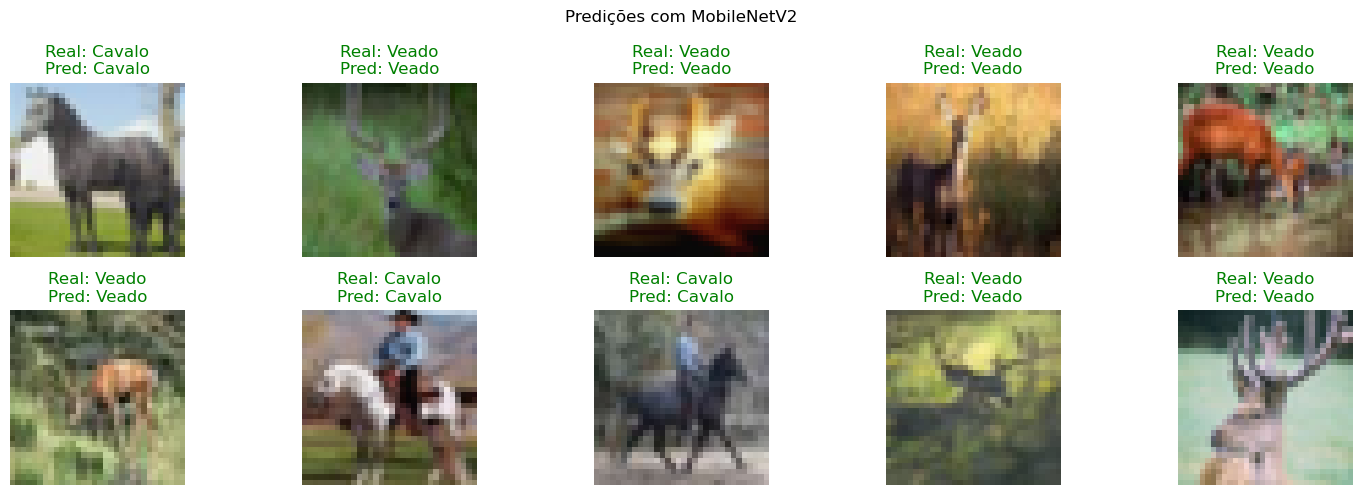

In [17]:
# Selecionar 10 imagens aleatórias
indices = random.sample(range(len(x_test_bin)), 10)
amostras = x_test_bin[indices]
rotulos = y_test_bin[indices]

# Pré-processar imagens manualmente para prever
imagens_prep = tf.image.resize(amostras, (96, 96)) / 255.0
predicoes = modelo.predict(imagens_prep)
predicoes_bin = (predicoes > 0.5).astype(int).flatten()

classe_nome = {0: "Veado", 1: "Cavalo"}

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(amostras[i])
    plt.axis("off")
    plt.title(f"Real: {classe_nome[rotulos[i][0]]}\nPred: {classe_nome[predicoes_bin[i]]}",
              color="green" if rotulos[i][0] == predicoes_bin[i] else "red")
plt.suptitle("Predições com MobileNetV2")
plt.tight_layout()
plt.show()

# **Referências**

* OLIVEIRA, Rogério. AI_TF_MNIST_Classifier.ipynb. GitHub/Google Colab, 2024. Disponível em: https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/AI_TF_MNIST_Classifier.ipynb. Acesso em: 20 maio 2025.

---

In [21]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Descricao_solucao = 7 #@param {type:"slider", min:0, max:10, step:1}

Implementacao = 9 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 6 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [22]:
#@title **Nota Final**
nota = Resumo + Descricao_solucao + Implementacao + Resultados + Referencias + Geral

nota = nota / 6

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,10364987,ENZO MAEDA,7.7
